# Unsupervised learning (Regression)

### Linear Regression

In [1]:
from sklearn.datasets import load_boston

In [2]:
X, y=load_boston(return_X_y = True)

D:\Users\Samin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
X.shape

(506, 13)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 9., 12., 18., 37., 40., 42., 83., 71., 72., 12., 23., 18., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <BarContainer object of 20 artists>)

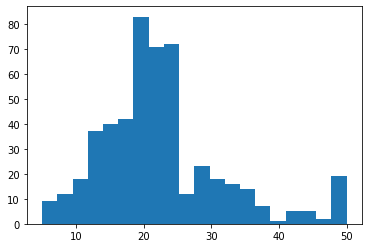

In [5]:
plt.hist(y,bins=20)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr  = LinearRegression().fit(X,y)

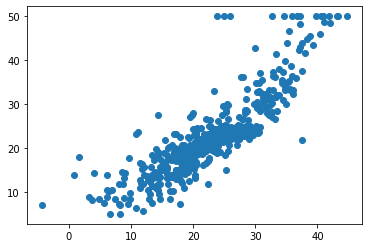

In [8]:
plt.scatter(lr.predict(X),y)

In [9]:
lr.score(X,y) #R2

0.7406426641094095

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA

In [11]:
steps = [('scaler',StandardScaler()),
         ('poly features',PolynomialFeatures()),
         ('dimension reduction',PCA(n_components=0.96)),
         ('Regression',LinearRegression())]
lr_pipeline = Pipeline(steps = steps)

In [12]:
lr_pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly features', PolynomialFeatures()),
                ('dimension reduction', PCA(n_components=0.96)),
                ('Regression', LinearRegression())])

In [13]:
lr_pipeline.score(X,y)

0.8235368668731399

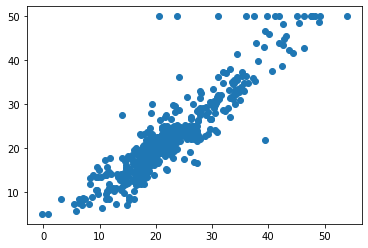

In [14]:
plt.scatter(lr_pipeline.predict(X),y)

### Ridge

In [15]:
from sklearn.linear_model import Ridge
from numpy.linalg import norm

In [16]:
rr = Ridge(alpha = 0.1).fit(X, y)
rr.score(X,y)

0.7406002922228037

In [17]:
norm(rr.coef_)

17.42078653983142

In [18]:
rr.coef_

array([-1.07473720e-01,  4.65716366e-02,  1.59989982e-02,  2.67001859e+00,
       -1.66846452e+01,  3.81823322e+00, -2.69060598e-04, -1.45962557e+00,
        3.03515266e-01, -1.24205910e-02, -9.40758541e-01,  9.36807461e-03,
       -5.25966203e-01])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)

In [21]:
X_train.shape

(430, 13)

In [22]:
steps = [('scaler',StandardScaler()),
         ('poly features',PolynomialFeatures(degree = 3,interaction_only = True)),
         ('dimension reduction',PCA(n_components=0.96)),
         ('Regression',Ridge(alpha=0.9))]

lr_pipeline = Pipeline(steps = steps)
lr_pipeline.fit(X_train,y_train)
lr_pipeline.score(X_test,y_test)

0.7620549471627303

### Lasso

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold,cross_validate

In [24]:
ls = Lasso(alpha=0.01).fit(X_train,y_train)
ls.score(X_test,y_test)

0.6441052676004366

In [25]:
ls.coef_

array([-1.09008508e-01,  4.49810953e-02,  2.95652809e-02,  3.02850057e+00,
       -1.68526146e+01,  3.88887121e+00,  7.99487001e-03, -1.46612165e+00,
        2.76840501e-01, -1.23404094e-02, -9.46675927e-01,  8.73267593e-03,
       -5.39708904e-01])

In [26]:
norm(ls.coef_,1)

27.211956207482036

In [27]:
kf = KFold(n_splits=5)

In [28]:
result = cross_validate(Lasso(alpha=0.01),X_train,y_train,cv=kf)

In [30]:
result['test_score'].mean(),result['test_score'].std()

(0.7309121570365258, 0.034925277224711684)